# 🌳 Decision Tree Classification Tutorial

This notebook demonstrates how to use Decision Trees for classification using the Iris dataset.

## 📦 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 🌼 Load Dataset

In [2]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 📊 Data Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

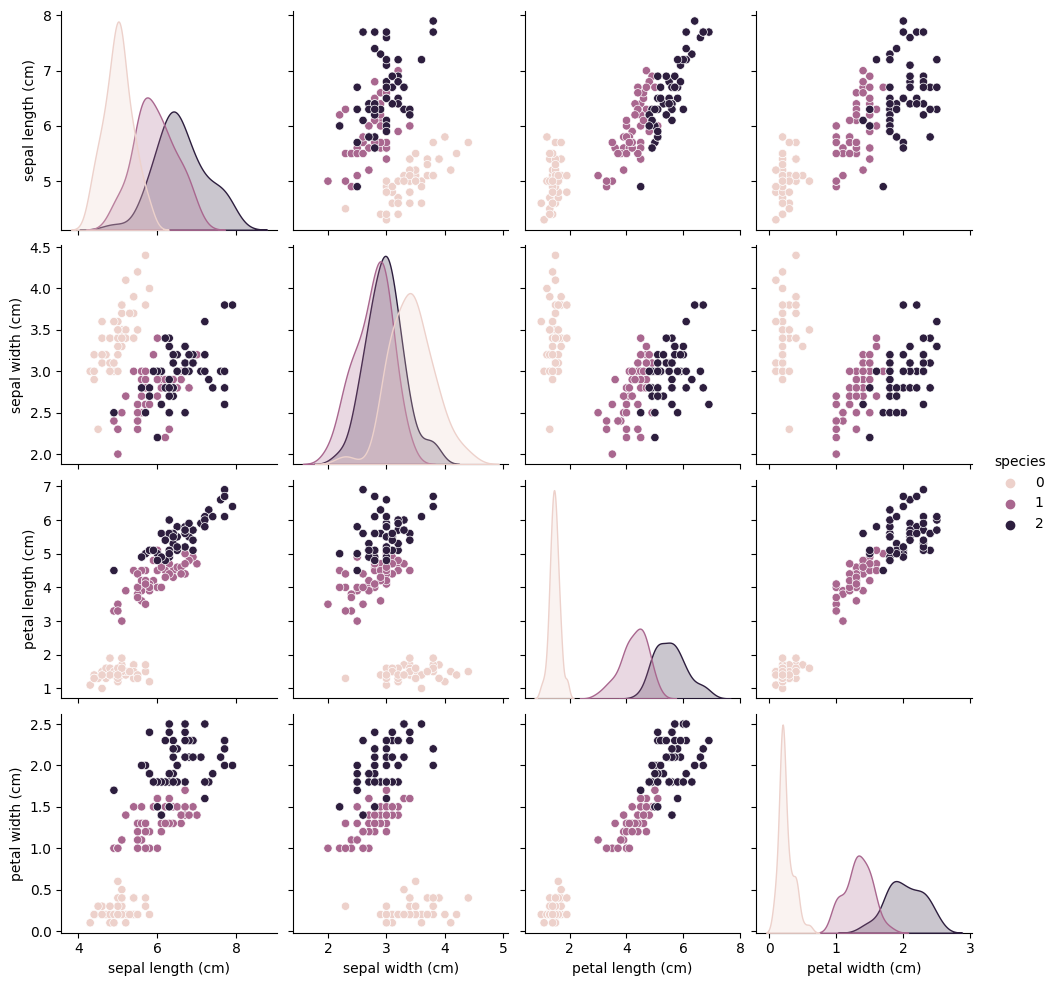

In [3]:
sns.pairplot(pd.concat([X, y.rename('species')], axis=1), hue='species')
plt.show()

## ✂️ Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🌳 Train Decision Tree Model

In [5]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 🎯 Predictions

In [6]:
y_pred = dt_model.predict(X_test)

## 📈 Model Evaluation

In [7]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 🔲 Confusion Matrix

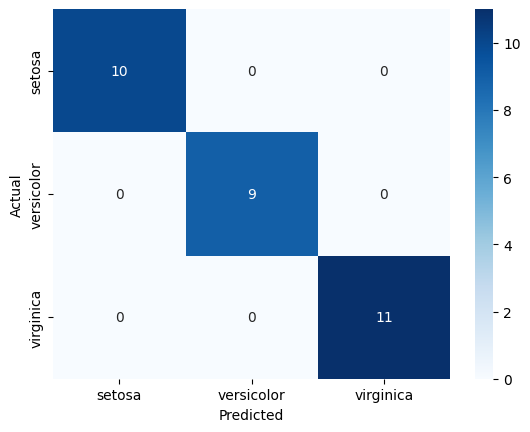

In [8]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🌿 Visualize Decision Tree

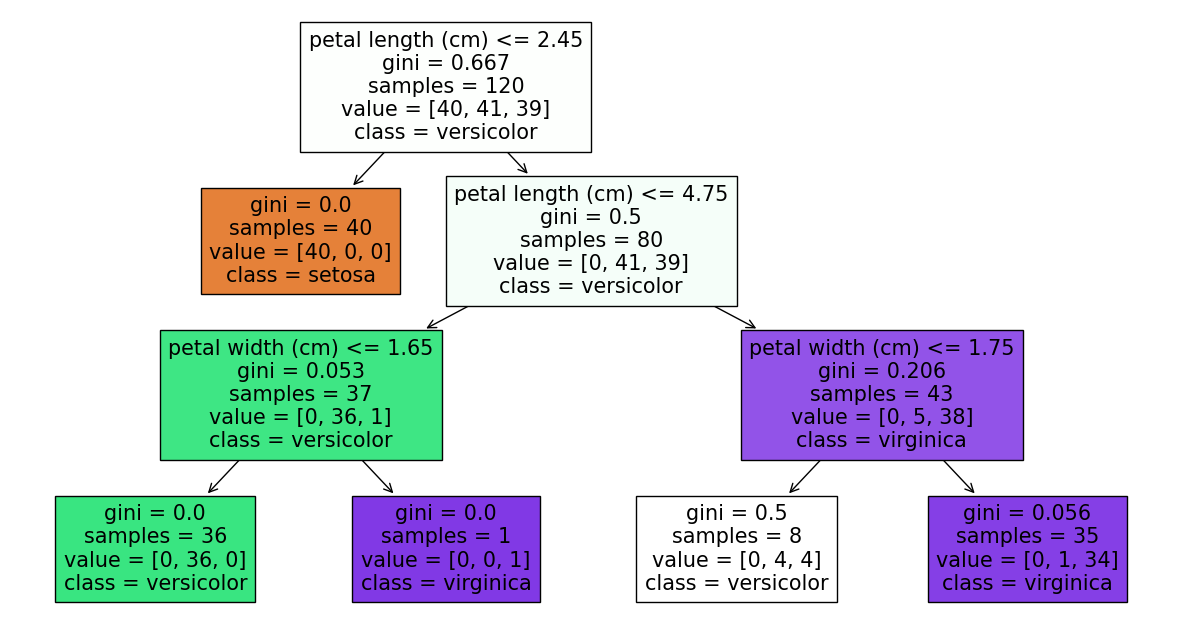

In [9]:
plt.figure(figsize=(15,8))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()

## 🔧 Feature Importance

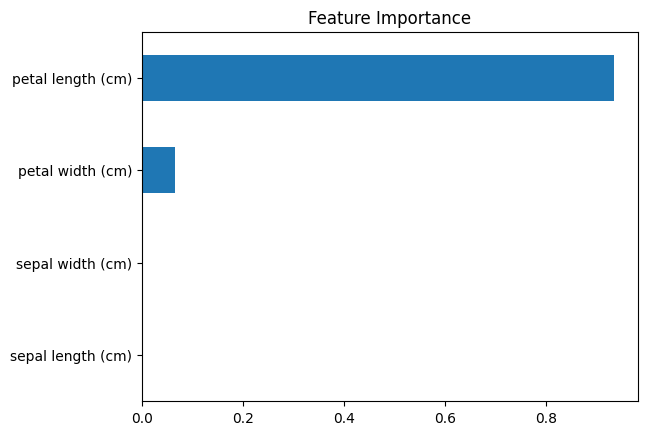

In [10]:
importance = pd.Series(dt_model.feature_importances_, index=iris.feature_names)
importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

## ✅ Conclusion
- Decision Trees are simple and interpretable
- Limiting depth avoids overfitting
- Visualization helps understand decisions